# Einblicke in einen Datenanalyseprozess (mit Python)


### Insbesondere: Kann ich meine Daten einfach aus der Datenbank in ein Analysesystem "kippen" und bekomme sinnvolle Ergebnisse ?


#### Usecase: Vorhersage von Preisen für Eigentumswohnungen
1. **CRIME**     - Kriminalitätsrate pro Block
2. **INDUSTRY**    - Anteil der Gewerbeflächen pro Block
3. **RIVERSIDE**     - Ist ein Fluss in der Nähe
4. **NOX**      - Stickoxidkonzentration (parts per 10 million)
5. **ROOMS**       - durchschnittliche Anzahl der Zimmer pro Wohnung
6. **AGE**      - Anteil der vor 1940 gebauten selbstgenutzten Einheiten
7. **DISTANCE**      - Gewichtete Entfernungen zu fünf Bostoner Arbeitsämtern
8. **AUTOBAHN**      - Index der Zugänglichkeit zu radialen Autobahnen
8. **TAX**     - Vollwertiger Grundsteuersatz pro 10.000 €
10. **EDUCATION** - Schüler-Lehrer-Verhältnis nach Block
11. **LOW_STATUS**   - niedrigerer Status der Bevölkerung
12. <span class="mark">**PREIS**    - Medianwert der Eigentumswohnungen in €</span>

In [1]:
from utilities import *
import seaborn as sb

# Daten Laden

#### Falls die Daten nicht dem vereinbarten Format entsprechen, hier: 
- .csv - Datei
- UTF-8 codierung  
- Trennzeichen : " ; "

####  kommt es schon beim Laden der Daten zu Fehlern.

In [2]:
data = pd.read_csv('daten.csv', sep=';', encoding='utf-8', decimal=',')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x80 in position 153: invalid start byte


### Hier wurde die Vorgabe der Codierung von *UTF-8* nicht beachtet !
#### In diesen Fällen müssen wir das richtige Encoding "raten", was zu Verzögerungen bei der Analyse führt. Außerdem ist eine automatische Verarbeitung der Daten in diesen Fällen nicht ohne manuelle intervention möglich.

#### In diesem Fall wurde das Encoding "Windows-1252" verwendet

In [3]:
data = pd.read_csv('daten.csv', sep=';', encoding='cp1252', decimal=',')
data.head()

,CRIME,INDUSTRY,RIVERSIDE,NOX,ROOMS,AGE,DISTANCE,AUTOBAHN,TAX,EDUCATION,LOW_STATUS,PREIS
0,0.02055,0.74,tract bounds river,0.410,6.383,35.7,9.1876,2,"313,0 €",17.3,5.77,24700.0
1,0.15086,27.74,tract bounds river,0.609,5.454,92.7,1.8209,4,"711,0 €",20.1,18.06,15200.0
2,0.04301,1.91,tract bounds river,0.413,5.663,21.9,10.5857,4,"334,0 €",22.0,8.05,18200.0
3,0.12757,4.93,tract bounds river,0.428,6.393,7.8,7.0355,6,"300,0 €",16.6,5.19,23700.0
4,0.09849,25.65,tract bounds river,0.581,5.879,95.8,2.0063,2,"188,0 €",19.1,17.58,18800.0


#### Nachdem die Daten geladen wurden, können wir beispielsweise den durchschnittlichen Preis und die durchschnittliche Steuer (TAX) berechnen:

In [4]:
data['PREIS'].mean()

21211.764705882353

In [5]:
data['TAX'].mean()

TypeError: Could not convert 313,0 €711,0 €334,0 €300,0 €188,0 €666,0 €666,0 €243,0 €233,0 €398,0 €666,0 €666,0 €334,0 €666,0 €281,0 €307,0 €243,0 €335,0 €437,0 €222,0 €276,0 €311,0 €666,0 €358,0 €311,0 €307,0 €330,0 €242,0 €666,0 €277,0 €304,0 €264,0 €276,0 €430,0 €284,0 €329,0 €329,0 €307,0 €666,0 €469,0 €224,0 €264,0 €666,0 €437,0 €403,0 €422,0 €281,0 €304,0 €304,0 €403,0 €193,0 €402,0 €307,0 €329,0 €348,0 €666,0 €307,0 €666,0 €384,0 €304,0 €666,0 €666,0 €666,0 €403,0 €193,0 €265,0 €666,0 €277,0 €398,0 €666,0 €307,0 €403,0 €403,0 €437,0 €273,0 €254,0 €296,0 €307,0 €437,0 €270,0 €247,0 €391,0 €222,0 €666,0 €307,0 €304,0 €666,0 €432,0 €398,0 €666,0 €311,0 €398,0 €296,0 €311,0 €222,0 €666,0 €193,0 €300,0 €244,0 €666,0 €398,0 €300,0 €287,0 €245,0 €224,0 €666,0 €289,0 €330,0 €193,0 €270,0 €307,0 €666,0 €391,0 €437,0 €666,0 €289,0 €402,0 €233,0 €666,0 €300,0 €711,0 €279,0 €666,0 €432,0 €216,0 €666,0 €384,0 €293,0 €273,0 €329,0 €284,0 €307,0 €666,0 €277,0 €398,0 €666,0 €666,0 €188,0 €358,0 €307,0 €293,0 €666,0 €666,0 €273,0 €307,0 €216,0 €666,0 €307,0 €307,0 €666,0 €666,0 €437,0 €193,0 €330,0 €307,0 €666,0 €384,0 €307,0 €666,0 €226,0 €307,0 €222,0 €403,0 €666,0 €273,0 €666,0 €307,0 €223,0 €315,0 €432,0 €254,0 €666,0 €666,0 €311,0 €256,0 €666,0 €403,0 €437,0 €264,0 €666,0 €307,0 €287,0 €264,0 €233,0 €287,0 €345,0 €403,0 €307,0 €311,0 €242,0 €247,0 €437,0 €193,0 €284,0 €384,0 €193,0 €430,0 €187,0 €307,0 €403,0 €403,0 €337,0 €403,0 €264,0 €281,0 €666,0 €432,0 €300,0 €437,0 €307,0 €315,0 €666,0 €711,0 €254,0 €304,0 €222,0 €293,0 €666,0 €666,0 €666,0 €277,0 €666,0 €666,0 €666,0 €666,0 €216,0 €666,0 €270,0 €370,0 €284,0 €666,0 €403,0 €666,0 €188,0 €279,0 €311,0 €666,0 €279,0 €277,0 €233,0 €666,0 €666,0 €666,0 €666,0 €666,0 €345,0 €666,0 €666,0 €384,0 €222,0 €287,0 €307,0 €198,0 €437,0 €391,0 €222,0 €224,0 €296,0 €391,0 €254,0 €329,0 €666,0 €432,0 €666,0 €233,0 €270,0 €666,0 €432,0 €391,0 €276,0 €437,0 €284,0 €307,0 €304,0 €666,0 €666,0 €666,0 €666,0 €437,0 €307,0 €245,0 €307,0 €666,0 €223,0 €330,0 €252,0 €279,0 €337,0 €307,0 €304,0 €666,0 €335,0 €265,0 €666,0 €224,0 €307,0 €666,0 €247,0 €666,0 €277,0 €403,0 €224,0 €398,0 €666,0 €403,0 €437,0 €287,0 €276,0 €666,0 €666,0 €666,0 €666,0 €666,0 €216,0 €330,0 €666,0 €384,0 €270,0 €432,0 €277,0 €304,0 €307,0 €330,0 €188,0 €233,0 €666,0 €188,0 €287,0 €273,0 €403,0 €330,0 €264,0 €223,0 €289,0 €384,0 €277,0 €307,0 €296,0 €311,0 €287,0 €666,0 €277,0 €233,0 €307,0 €666,0 €307,0 €241,0 €432,0 €403,0 €403,0 €307,0 €311,0 €247,0 €666,0 €666,0 €330,0 €351,0 €307,0 €222,0 €264,0 €666,0 €403,0 €224,0 €296,0 €398,0 €296,0 €370,0 €666,0 €330,0 €287,0 €666,0 €437,0 €311,0 €403,0 €403,0 €307,0 €666,0 €305,0 €348,0 €224,0 €285,0 €666,0 €391,0 €666,0 €411,0 €666,0 €666,0 €666,0 €384,0 €398,0 €281,0 €300,0 €352,0 €243,0 €311,0 €307,0 €276,0 €666,0 €411,0 €666,0 €666,0 €666,0 €252,0 €666,0 €666,0 €403,0 €276,0 €222,0 €666,0 €666,0 €666,0 €216,0 €307,0 €398,0 €223,0 €307,0 €242,0 €666,0 €188,0 €403,0 €398,0 €284,0 €296,0 €307,0 €222,0 €403,0 €233,0 €254,0 €384,0 €243,0 €296,0 €304,0 €666,0 €666,0 €264,0 €666,0 €666,0 €666,0 €666,0 €403,0 €277,0 €384,0 €666,0 €304,0 €304,0 €276,0 €352,0 €666,0 €193,0 €270,0 €666,0 €403,0 €398,0 €307,0 €305,0 €307,0 €304,0 €666,0 €432,0 €403,0 €666,0 €242,0 €666,0 €403,0 €224,0 €666,0 €403,0 €666,0 €255,0 €307,0 €711,0 €307,0 €264,0 €330,0 €307,0 €264,0 €666,0 €224,0 €284,0 €403,0 €277,0 €188,0 €223,0 €403,0 €307,0 €311,0 €666,0 €280,0 €264,0 €345,0 €264,0 €666,0 €305,0 €296,0 €289,0 €304,0 €666,0 €289,0 €233,0 €711,0 €300,0 €384,0 €270,0 €329,0 €666,0 €276,0 €224,0 €666,0 €666,0 €666,0 €666,0 €311,0 €276,0 €305,0 €391,0 €430,0 €245,0 €358,0 €437,0 €311,0 €666,0 €307,0 €666,0 €666,0 €391,0 €307,0 €307,0 € to numeric

#### Die Berechnung der durchschnittlichen Steuer (TAX) schlägt allerdings fehl, da das €-Zeichen nach dem Betrag zu einer Interpretation der Einträge als Zeichenkette (string) führt.

#### Das Feld muss deshalb manuell umformatiert werden.

In [6]:
# Entfernung des €-Zeichens und anschließende Formatierung der Werte als Zahlen (float).
data['TAX'] = data.TAX.map(lambda z : z[:-2].replace(',','.')).astype(float)

#### Nun kann die durchschnittliche Steuer (TAX) berechnet werden:

In [7]:
data['TAX'].mean()

403.5047438330171

#### Bevor eine weitere Analyse durchgeführt wird, untersuchen wir zunächst die Daten auf Vollständigkeit der Einträge:

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIME       521 non-null    float64
 1   INDUSTRY    527 non-null    float64
 2   RIVERSIDE   527 non-null    object 
 3   NOX         527 non-null    float64
 4   ROOMS       527 non-null    float64
 5   AGE         527 non-null    float64
 6   DISTANCE    527 non-null    float64
 7   AUTOBAHN    527 non-null    int64  
 8   TAX         527 non-null    float64
 9   EDUCATION   527 non-null    float64
 10  LOW_STATUS  527 non-null    float64
 11  PREIS       527 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 49.5+ KB


#### Im Unterschied zu den restlichen Spalten, enhält "CRIME" nur 521 (von 527) nicht-leere Einträge.

In [9]:
data[data.CRIME.isnull()]

,CRIME,INDUSTRY,RIVERSIDE,NOX,ROOMS,AGE,DISTANCE,AUTOBAHN,TAX,EDUCATION,LOW_STATUS,PREIS
156,NaN,8.56,tract bounds river,0.520,6.405,85.4,2.7147,5,384.0,20.9,10.63,18600.0
179,NaN,18.10,tract bounds river,0.693,6.343,100.0,1.5741,24,666.0,20.2,20.32,7200.0
215,NaN,2.18,tract bounds river,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,-1000.0
255,NaN,2.18,tract bounds river,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33400.0
362,NaN,5.19,tract bounds river,0.515,6.316,38.1,6.4584,5,224.0,20.2,5.68,22200.0
375,NaN,6.20,otherwise,0.507,6.879,77.7,3.2721,8,307.0,17.4,9.93,27500.0


#### Um die Daten in folgenden Verarbeiten zu können, werden die entsprechenden Reihen mit leeren Einträgen entfernt.

In [10]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 521 entries, 0 to 526
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIME       521 non-null    float64
 1   INDUSTRY    521 non-null    float64
 2   RIVERSIDE   521 non-null    object 
 3   NOX         521 non-null    float64
 4   ROOMS       521 non-null    float64
 5   AGE         521 non-null    float64
 6   DISTANCE    521 non-null    float64
 7   AUTOBAHN    521 non-null    int64  
 8   TAX         521 non-null    float64
 9   EDUCATION   521 non-null    float64
 10  LOW_STATUS  521 non-null    float64
 11  PREIS       521 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 52.9+ KB


#### Nun sind nur noch die vollständigen Einträge (521) enthalten. 

# Visualisierung

#### Die Visualisierung der Daten stellt einen wichtigen ersten Schnitt nach der Vorverarbietung dar und ermöglicht verschiedene Plausiblitätschecks.

#### Wir betrachten im folgenden die Verteilung der Steuer (TAX) und der Preise:

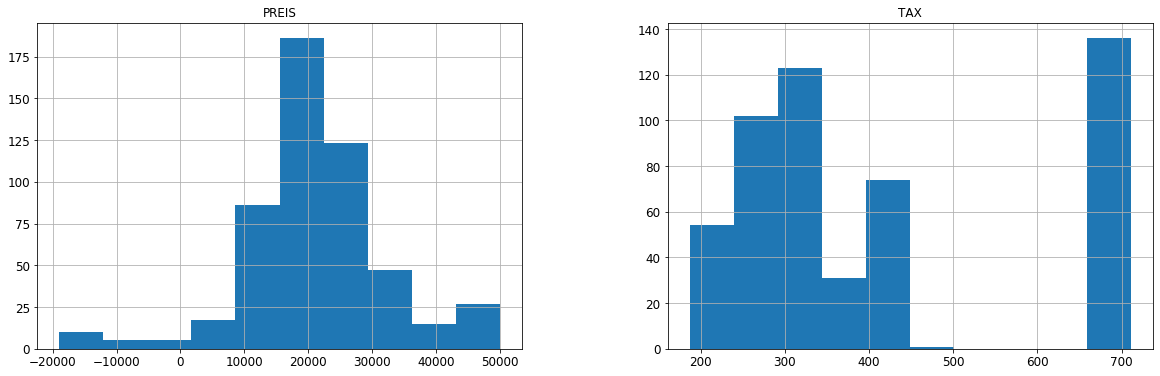

In [11]:
data[['PREIS', 'TAX']].hist(figsize=(20,6));

#### Es fällt auf, dass die Verteilung der Preise negative Einträge enthält !

In [12]:
data[data.PREIS < 0].head()

,CRIME,INDUSTRY,RIVERSIDE,NOX,ROOMS,AGE,DISTANCE,AUTOBAHN,TAX,EDUCATION,LOW_STATUS,PREIS
21,0.21124,7.87,tract bounds river,0.524,5.631,100.0,6.0821,5,311.0,15.2,29.93,-19000.0
24,0.14455,7.87,tract bounds river,0.524,6.172,96.1,5.9505,5,311.0,15.2,19.15,-19000.0
25,0.62739,8.14,tract bounds river,0.538,5.834,56.5,4.4986,4,307.0,21.0,8.47,-11000.0
27,0.02729,7.07,tract bounds river,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,-15000.0
93,0.09378,7.87,tract bounds river,0.524,5.889,39.0,5.4509,5,311.0,15.2,15.71,-16000.0


#### Solche unplausiblen Einträge sind nicht untypisch und erfordern normalerweise eine Rücksprache mit dem Kunden und eine genaue Untersuchung der Ursachen. 

#### Oft sind hierfür entweder Fehler bei der Datenerfassung oder eine interne Codierung (z.B. "-1" oder "9999" für fehlende Werte oder Fehlerfälle o.ä.)  verantwortlich. 

#### Bleiben solche Fehler unentdeckt, kann dies zu einer erheblichen Verzerrung der weiteren Berechnungen führen (siehe Durchschnittswert). Im folgenden werden wir die entsprechenden Einträge aus der Analyse ausschließen.

In [13]:
data = data[data.PREIS > 0]

#### Nun können wir noch weitere Visualisierungen der Daten erstellen (hier durch bereits vorbereitete Funktionen).

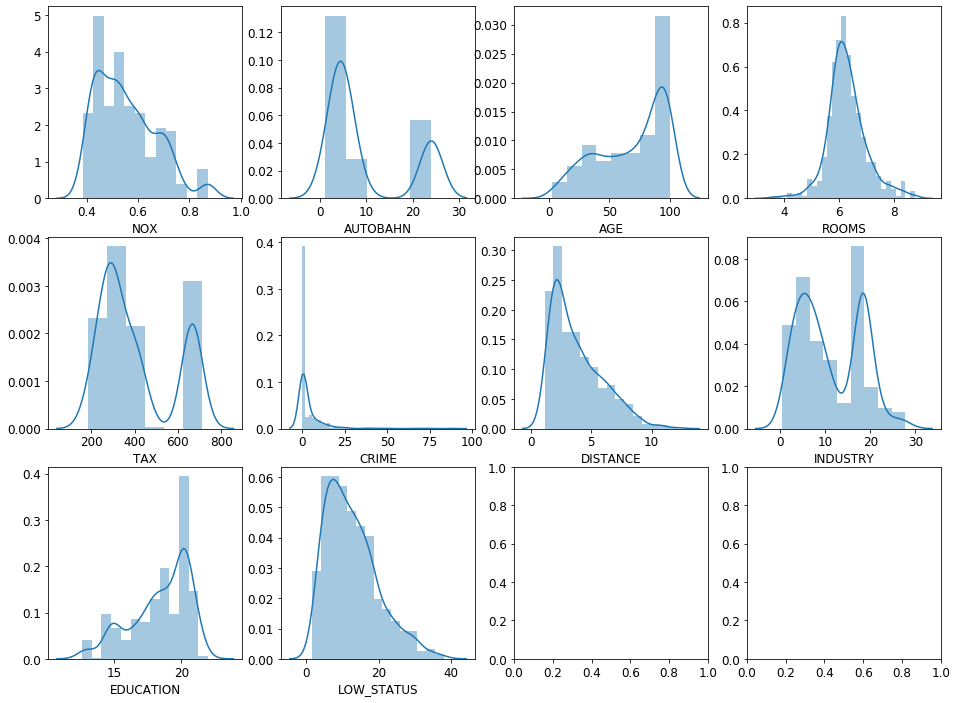

In [14]:
Verteilung_der_Merkmale(data)

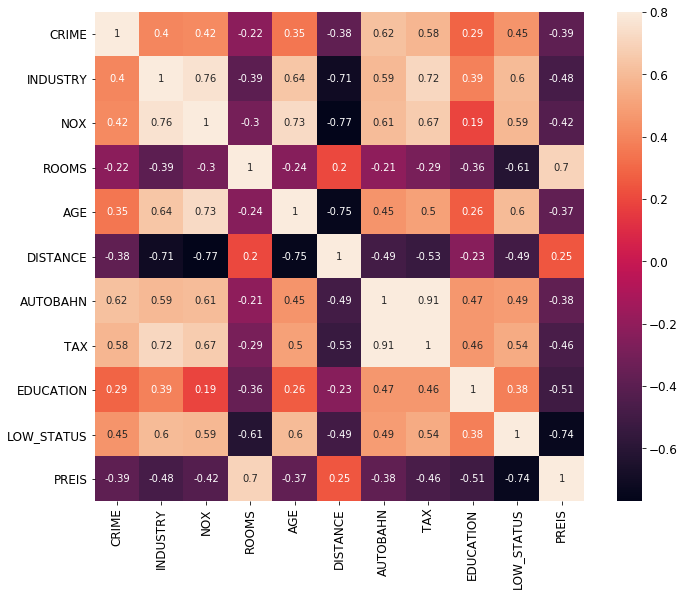

In [15]:
# Die Korrelation der Merkmale untereinander
Korrelation(data)

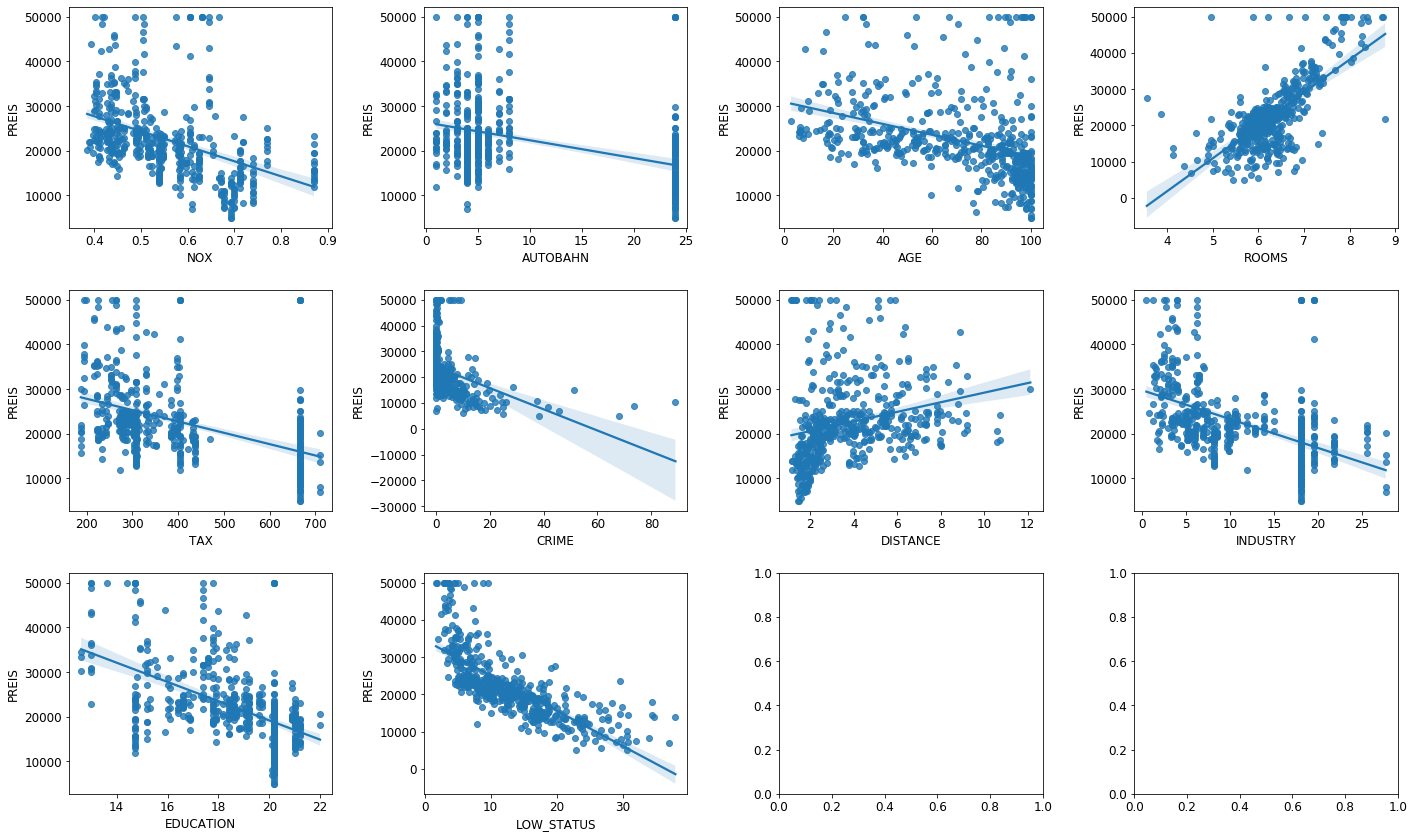

In [16]:
# Zusammenhang der anderen Merkmale mit dem Preis
Merkmale_Ziel_Korrelation(data)

# Modelbildung und Evaluation

#### Im Folgenden erstellen wir ein Regressionsmodell zur Vorhersage der Wohnungspreise.

#### Hierfür wird der Datensatz zur späteren Validierung der Modelle zunächst in Trainings-und Testdaten (70/30) unterteilt. Weiterhin werden die Daten standardisiert (dies ist für manche Modelle notwendig).

In [17]:
# Test train split
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['PREIS', 'RIVERSIDE'], axis=1), 
                                                data.PREIS, test_size=.3, random_state=1)

# Standartisierung der Daten
mean, std = xtrain.mean() , xtrain.std()
xtrain = (xtrain - mean)/std
xtest = (xtest - mean)/std

print('Größte des Trainingsets : ', xtrain.shape[0])
print('Größte des Testsets : ', xtest.shape[0])

Größte des Trainingsets :  350
Größte des Testsets :  151


Mittlerer quadrierter (test) Fehler: 26,432,268 €²
Wurzel des mittleren quadrierten (test) Fehlers: 5,141 €


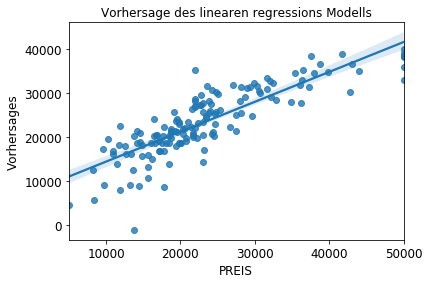

In [18]:
# Lineares Regressionsmodell
Lineare_Regression = Regressor('LR').fit_evaluate(xtrain, xtest, ytrain, ytest, True)

Mittlerer quadrierter (test) Fehler: 13,744,155 €²
Wurzel des mittleren quadrierten (test) Fehlers: 3,707 €


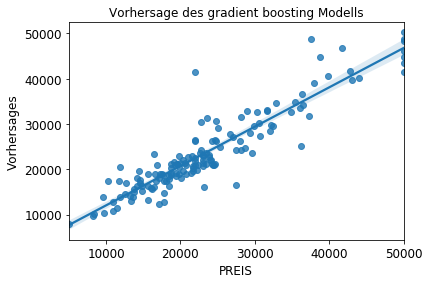

In [19]:
# Gradient boosting
Gradient_Boosting = Regressor('GB').fit_evaluate(xtrain, xtest, ytrain, ytest, True)

#### Manche Modelle (hier: lineare Regression) ermöglichen es uns den Einfluss der Merkmale auf die Zielvariable zu beurteilen

<Figure size 720x432 with 0 Axes>

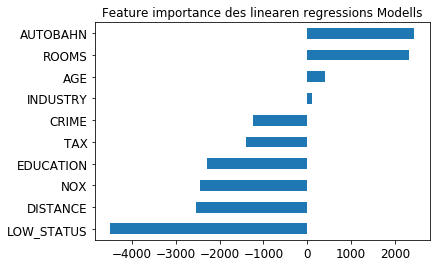

In [20]:
feature_importance(Lineare_Regression, xtrain.columns)

<Figure size 720x432 with 0 Axes>

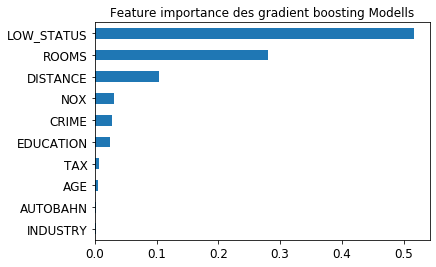

In [21]:
feature_importance(Gradient_Boosting, xtrain.columns)

#### Der Status der Bevölkerung in der Wohngegend (LOW_STATUS) wird von beiden Modellen als wichtigstes Merkmal zur Vorhersage des Wohnungspreises verwendet. 

# Fazit:
- Standards beim Datenaustausch und der Datenverarbeitung sind notwendig !
- Datenfelder sollten einheitlich codiert werden.
- Rohdaten sind meistens nicht direkt zur Analyse und Modellbildung geeignet und müssen vorverarbeitet werden.
- Daten in ein System "kippen" und automatisch analysieren lassen funktioniert meistens nicht.
- Einer Datenanalyse und Modellbildung geht oft ein erheblicher Aufwand an Bereinigung der Daten voraus. Dieses Jupyter Notebook stammt aus einem Vortrag von Michael Hefenbrock am “1. Smart Data und KI Tag”.